### This is the undirected network of common noun and adjective adjacencies for the novel David Copperfield by English 19th century writer Charles Dickens. 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pathlib import Path # do pracy z plikami


In [25]:
NODES_PATH = Path('nodes_names.txt').resolve()
EDGES_PATH = Path('edges.txt').resolve()

In [26]:
with open(NODES_PATH, 'r') as f:
    nodes_list = f.read().splitlines()

with open(EDGES_PATH, 'r') as f:
    rows = f.read().splitlines()
# jedna krawedz ma wygladac tak (N1,N2)
edges = []
for row in rows:
    e = row.split(' ')
    edge1 = int(e[0])
    edge2 = int(e[1])
    edges.append((edge1, edge2))

len(nodes_list) 
max_num_in_edges = max([max(e) for e in edges])
max_num_in_edges == len(nodes_list) # zwroci false jak istnieja polaczenia miedzy nieistniejacymi wierzcholkami

True

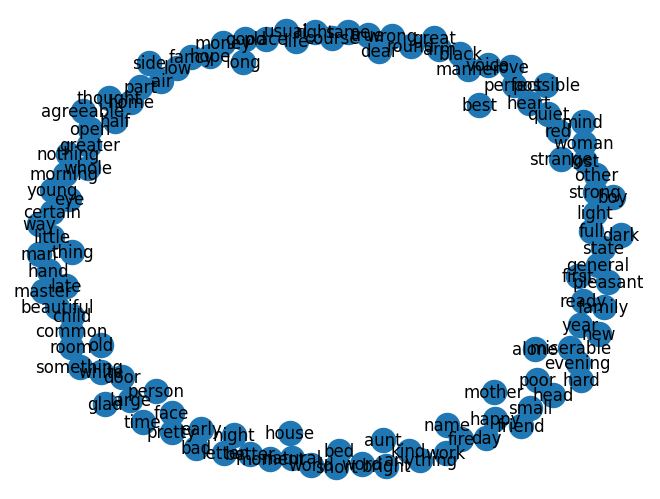

In [27]:
G = nx.Graph() # undirected graph
for i, node in enumerate(nodes_list): # w edges.txt numery ida od jedynki
    G.add_node(i+1, label=node)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

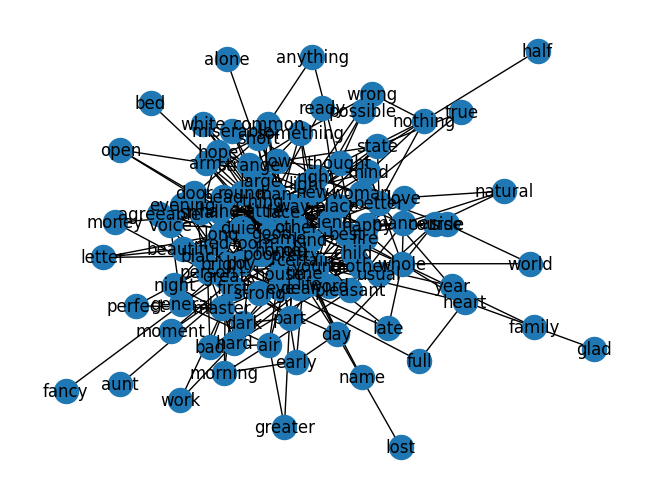

In [28]:
G.add_edges_from(edges)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

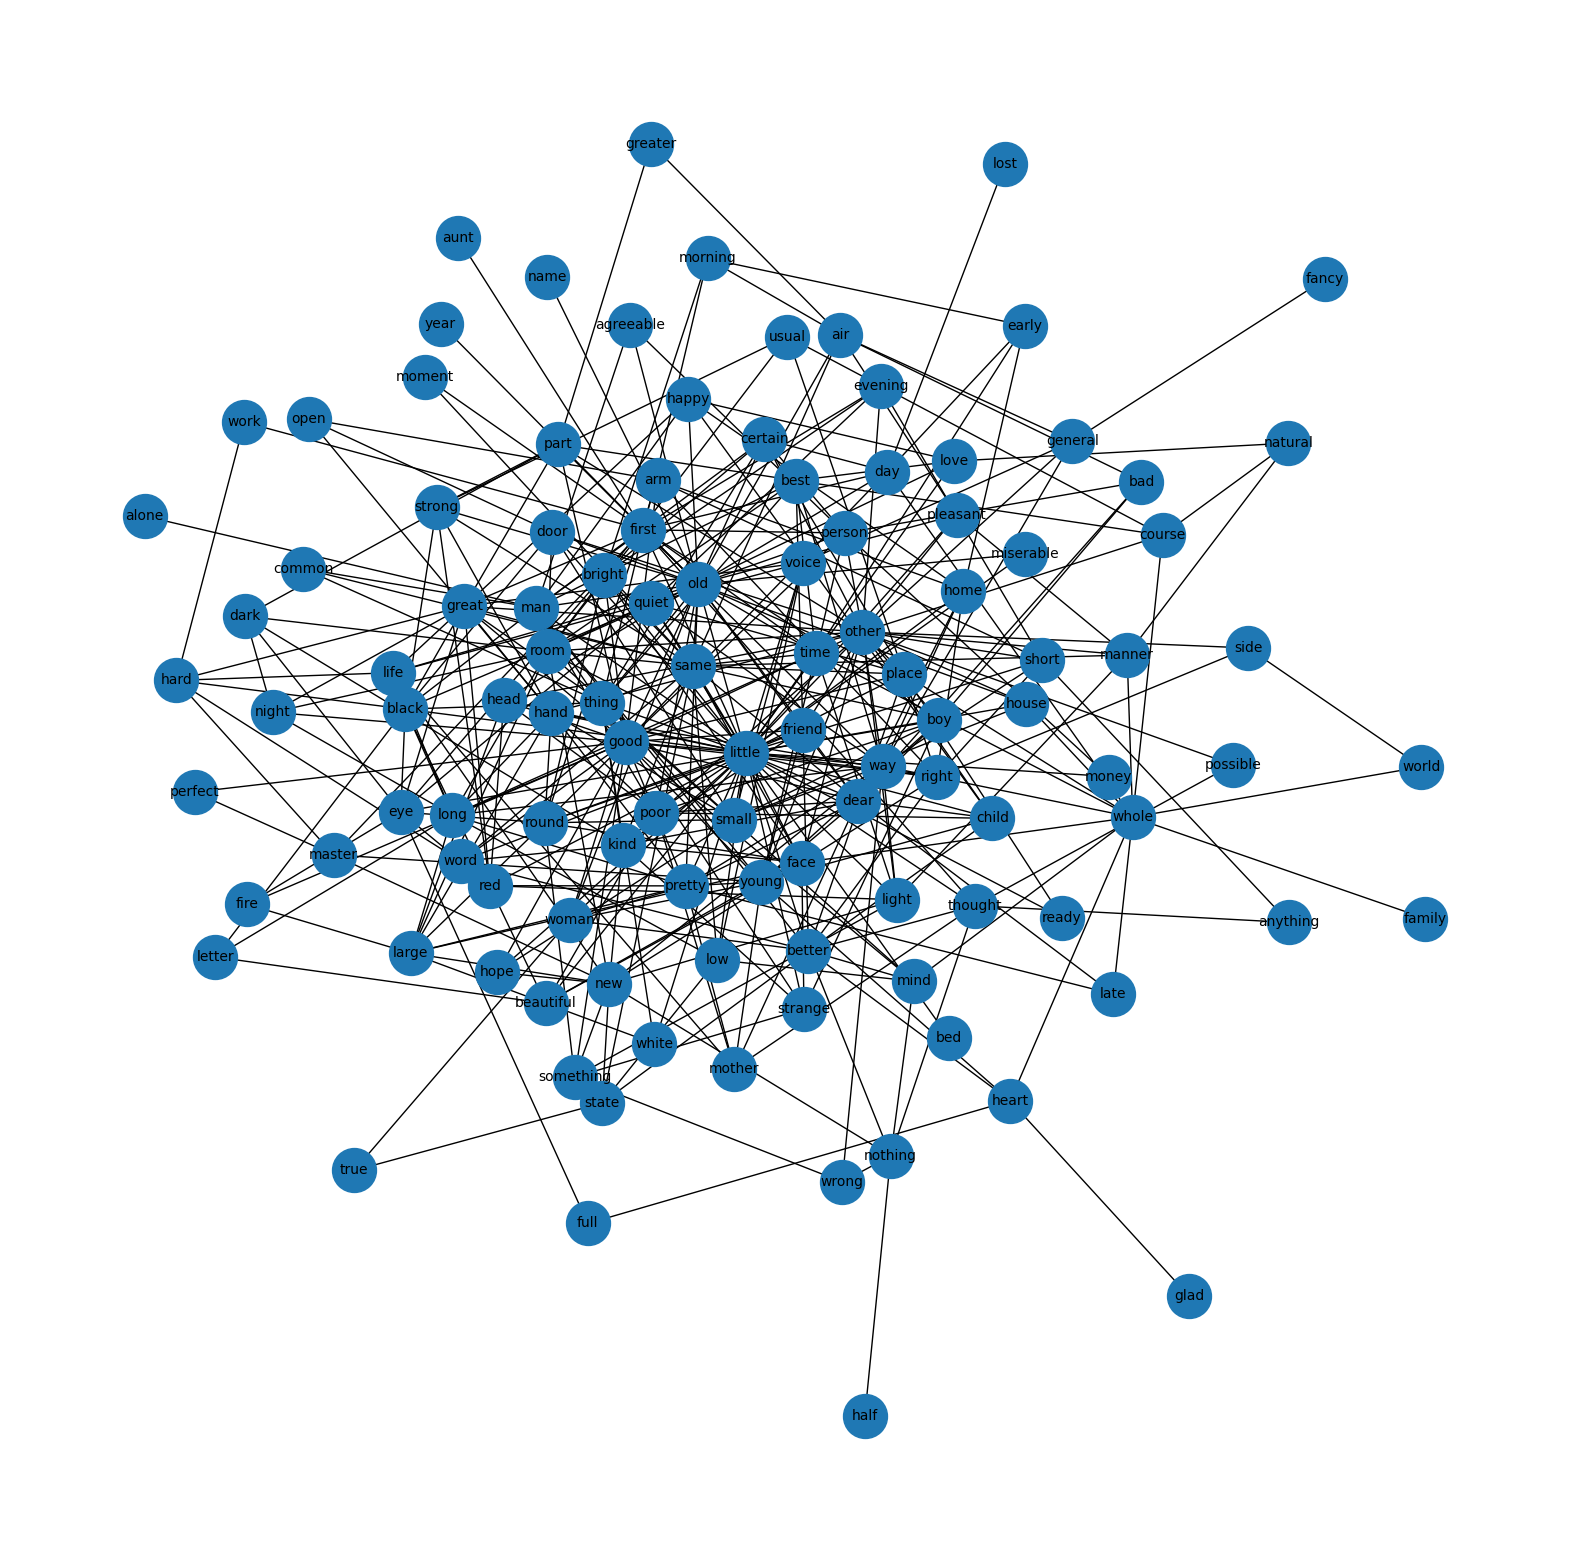

In [29]:
# https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=1000, font_size=10)

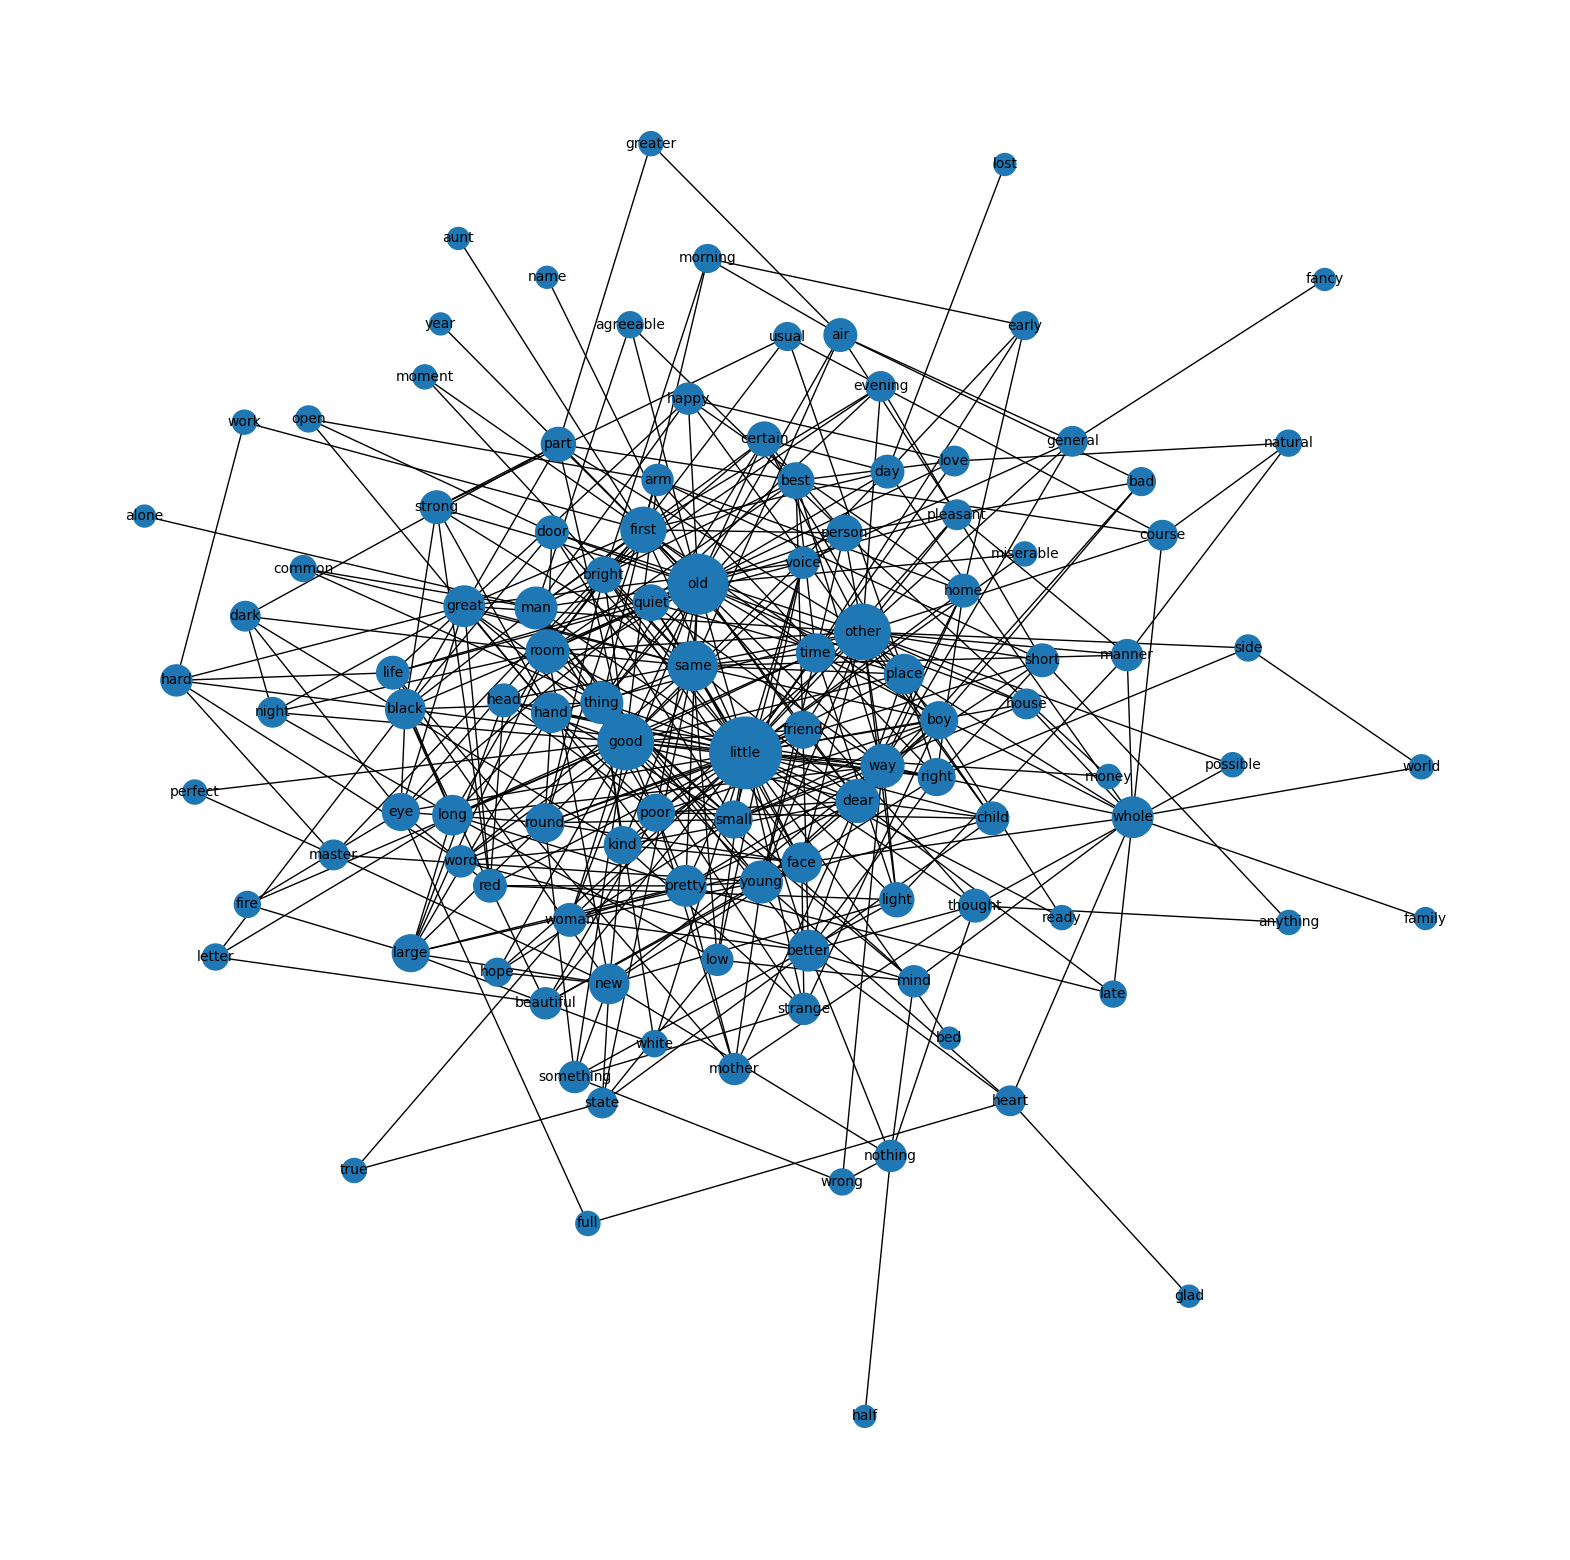

In [30]:
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
# degree - stopien wierzcholka czyli ilsoc krawedzi
node_sizes = [(G.degree(n))*50 + 200 for n in G.nodes()]
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=node_sizes, font_size=10)

In [31]:
node = G.nodes[1]
node['label']

'man'

In [32]:
# najpopularniejsze slowa
# nx.degree(G) - zwraca liste tupli (node, degree)
def get_n_words(G: nx.Graph, n: int) -> list:
  degrees = nx.degree(G)
  # bierze kazzdy element z listy i sortuje po drugim elemencie i odwraca
  degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
  # degree[0] - index wierzcholka, degree[1] - stopien wierzcholka
  degrees = [(G.nodes[degree[0]]['label'],degree[1]) for degree in degrees]
  return degrees[:n] # [0:n] == [:n]
get_n_words(G,10)

[('little', 49),
 ('old', 33),
 ('other', 28),
 ('good', 28),
 ('same', 21),
 ('first', 17),
 ('room', 15),
 ('way', 15),
 ('dear', 15),
 ('man', 14)]

### Czego mozna potencjalnie sie dowiedziec ze stworzonej siec i jakich narzedzi sieci zlozonych uzyc (kilka,kilkanaście)
### klika,najkrotsza  sciezka, triada, modul itd - czego by ta miara dostaczyla
    Stopien wierzcholka
    klika
    liczba modułów
    najkrotsza sciezka
    najdluzsza sciezka
    motywy
    gestosc
    
    analiza k-rdzenii (kluczowe slowa w tej literaturze) !
    kliki !
    srednica (ktore slowa maja ze soba najmniej wspolnego) !
    metoda symulacyjna dodac jakies slowa i sprawdzic jak siec sie zmienila
    

In [33]:
nx.diameter(G) #jak zroznicowanie jest uzycie slow

5

Graph with 44 nodes and 210 edges


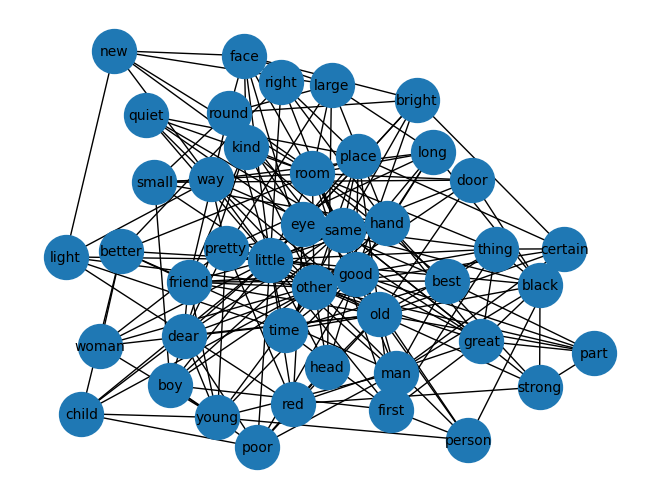

In [34]:
# analiza k-rdzeni
k_cores = nx.k_core(G,k=6)
nx.draw(k_cores, with_labels=True, labels=nx.get_node_attributes(k_cores, 'label'), node_size=1000, font_size=10)
# to jest siec najsilniej usieciowionych slow
print(k_cores)


In [35]:
# kliki
clicks = nx.find_cliques(G)
clicks = list(clicks)
# klika z 2 eleemntami nie jest interesujaca
clicks = [sorted(click) for click in clicks if len(click) > 2]
clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]
clicks
# plot clicks
print(f'kazde z tych slow wystepowalo ze soba bezposrednio polaczone:')
for click in clicks:
    names = [G.nodes[node]['label'] for node in click]
    print(f'klika: {names}')

kazde z tych slow wystepowalo ze soba bezposrednio polaczone:
klika: ['old', 'little', 'woman', 'good', 'pretty']
klika: ['old', 'little', 'friend', 'dear', 'good']
klika: ['old', 'little', 'dear', 'good', 'pretty']


In [36]:
NEW_WORDS = {'wheather': ['bad', 'good', 'best', 'pretty', 'strange', 'thought', 'good'],
            'big': ['lost', 'family', 'world', 'house', 'money', 'moment', 'day', 'woman', 'heart', 'boy', 'man', 'word','arm','black','head','fancy'],
            'polite': ['man', 'woman','boy'],
            'inteligent': ['person', 'man','boy','woman','word'],
            'chin': ['small', 'big'],
            'water': ['low'],
            'breakfast': ['person', 'think'],
            'tool': ['same', 'wrong','small','other','short'],
            'beard': ['small', 'big','best','black','long']}
words_in_net = [G.nodes[node]['label'] for node in G.nodes()]
NEW_G = G.copy()
for word in NEW_WORDS:
    if word not in words_in_net:
        NEW_G.add_node(len(NEW_G.nodes())+1, label=word)
        for new_word in NEW_WORDS[word]:
            if new_word in words_in_net:
                NEW_G.add_edge(len(NEW_G.nodes()), nodes_list.index(new_word)+1)
            print(f'added edge {word} -> {new_word}')

added edge wheather -> bad
added edge wheather -> good
added edge wheather -> best
added edge wheather -> pretty
added edge wheather -> strange
added edge wheather -> thought
added edge wheather -> good
added edge big -> lost
added edge big -> family
added edge big -> world
added edge big -> house
added edge big -> money
added edge big -> moment
added edge big -> day
added edge big -> woman
added edge big -> heart
added edge big -> boy
added edge big -> man
added edge big -> word
added edge big -> arm
added edge big -> black
added edge big -> head
added edge big -> fancy
added edge polite -> man
added edge polite -> woman
added edge polite -> boy
added edge inteligent -> person
added edge inteligent -> man
added edge inteligent -> boy
added edge inteligent -> woman
added edge inteligent -> word
added edge chin -> small
added edge chin -> big
added edge water -> low
added edge breakfast -> person
added edge breakfast -> think
added edge tool -> same
added edge tool -> wrong
added edge t

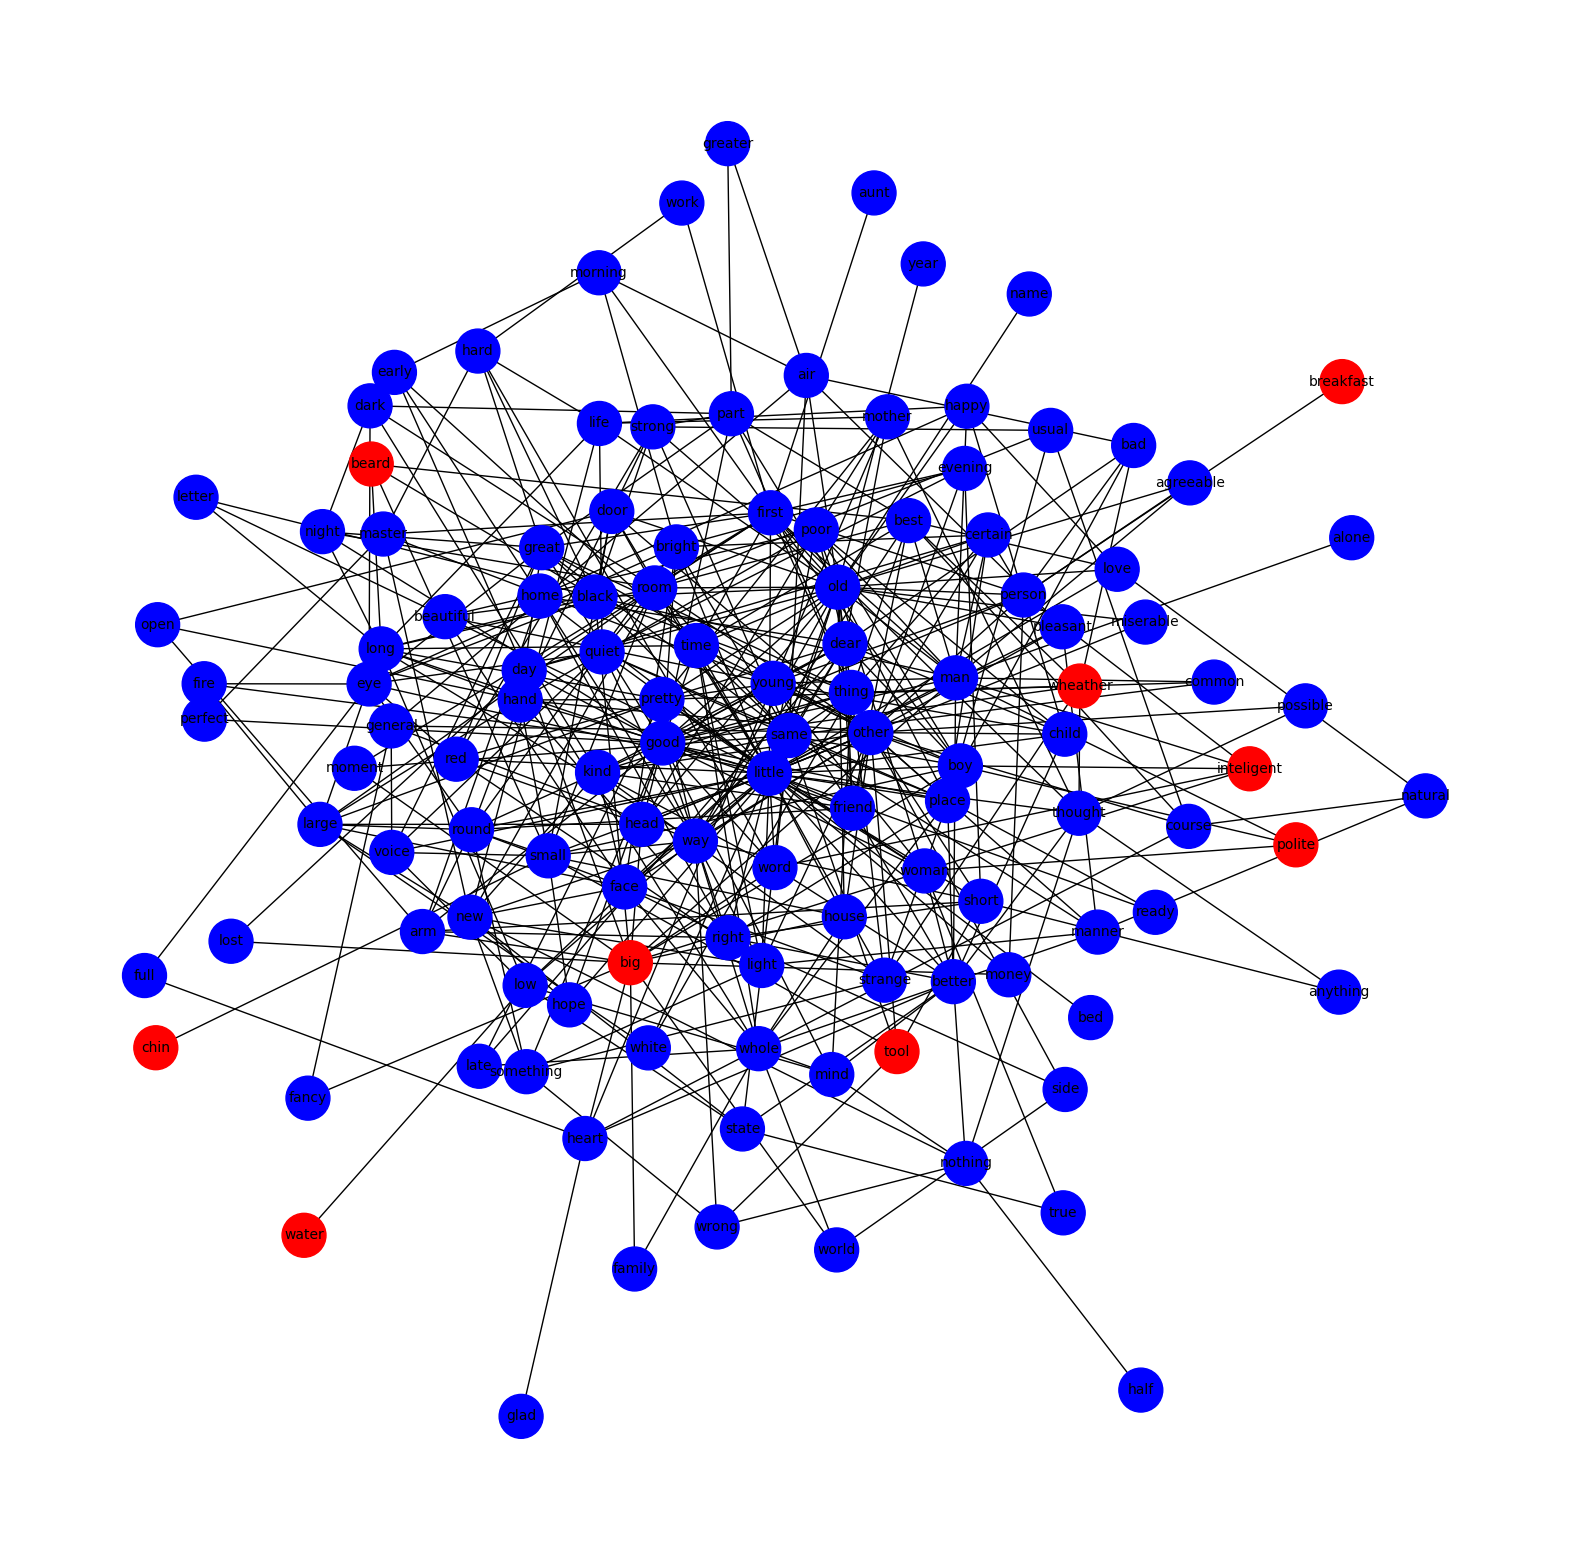

In [37]:
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(NEW_G)
#pos = nx.layo
new = NEW_WORDS.keys()
color = ['red' if  NEW_G.nodes[node]['label'] in new else 'blue' for node in NEW_G.nodes()]
nx.draw(NEW_G, with_labels=True, labels=nx.get_node_attributes(NEW_G, 'label'), ax=ax, pos = pos, node_size=1000, font_size=10, node_color=color)


In [38]:
nx.diameter(NEW_G)

5

Graph with 49 nodes and 237 edges


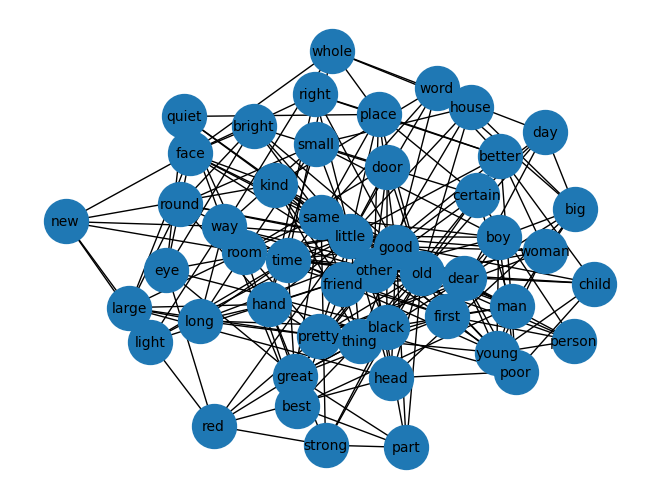

In [39]:
k_cores = nx.k_core(NEW_G,k=6)
nx.draw(k_cores, with_labels=True, labels=nx.get_node_attributes(k_cores, 'label'), node_size=1000, font_size=10)
print(k_cores)

In [40]:
# kliki
clicks = nx.find_cliques(NEW_G)
clicks = list(clicks)
# klika z 2 eleemntami nie jest interesujaca
clicks = [sorted(click) for click in clicks if len(click) > 2]
clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]
clicks
# plot clicks
print(f'kazde z tych slow wystepowalo ze soba bezposrednio polaczone:')
for click in clicks:
    names = [NEW_G.nodes[node]['label'] for node in click]
    print(f'klika: {names}')

kazde z tych slow wystepowalo ze soba bezposrednio polaczone:
klika: ['old', 'little', 'woman', 'good', 'pretty']
klika: ['old', 'little', 'friend', 'dear', 'good']
klika: ['old', 'little', 'dear', 'good', 'pretty']


In [41]:
def get_n_words(NEW_G: nx.Graph, n: int) -> list:
  degrees = nx.degree(NEW_G)
  # bierze kazzdy element z listy i sortuje po drugim elemencie i odwraca
  degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
  # degree[0] - index wierzcholka, degree[1] - stopien wierzcholka
  degrees = [(NEW_G.nodes[degree[0]]['label'],degree[1]) for degree in degrees]
  return degrees[:n] # [0:n] == [:n]
get_n_words(NEW_G,10)


[('little', 49),
 ('old', 33),
 ('other', 29),
 ('good', 29),
 ('same', 22),
 ('man', 17),
 ('first', 17),
 ('big', 16),
 ('room', 15),
 ('way', 15)]

_______________________________________________

In [42]:
NODES_PATH = Path('nodes_names_chapter2.txt').resolve()
EDGES_PATH = Path('edges_chapter2.txt').resolve()

In [43]:
with open(NODES_PATH, 'r') as f:
    nodes_list = f.read().splitlines()

with open(EDGES_PATH, 'r') as f:
    rows = f.read().splitlines()
# jedna krawedz ma wygladac tak (N1,N2)
edges = []
for row in rows:
    e = row.split(' ')
    edge1 = int(e[0])
    edge2 = int(e[1])
    edges.append((edge1, edge2))

len(nodes_list) 
max_num_in_edges = max([max(e) for e in edges])
max_num_in_edges == len(nodes_list) # zwroci false jak istnieja polaczenia miedzy nieistniejacymi wierzcholkami

False

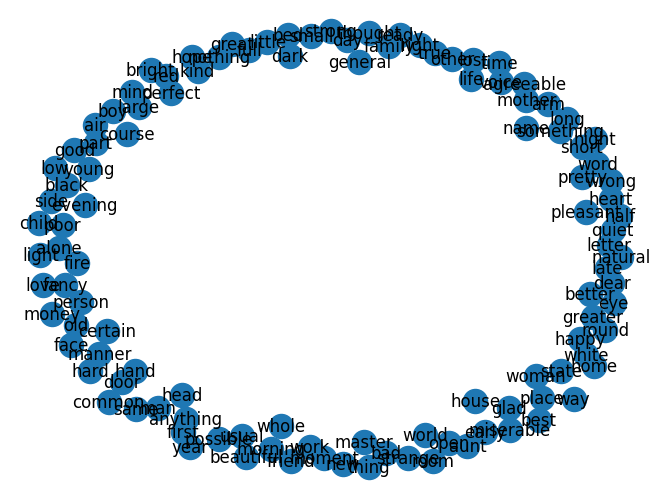

In [44]:
Gc2 = nx.Graph() # undirected graph
for i, node in enumerate(nodes_list): # w edges.txt numery ida od jedynki
    Gc2.add_node(i+1, label=node)
nx.draw(Gc2, with_labels=True, labels=nx.get_node_attributes(Gc2, 'label'))

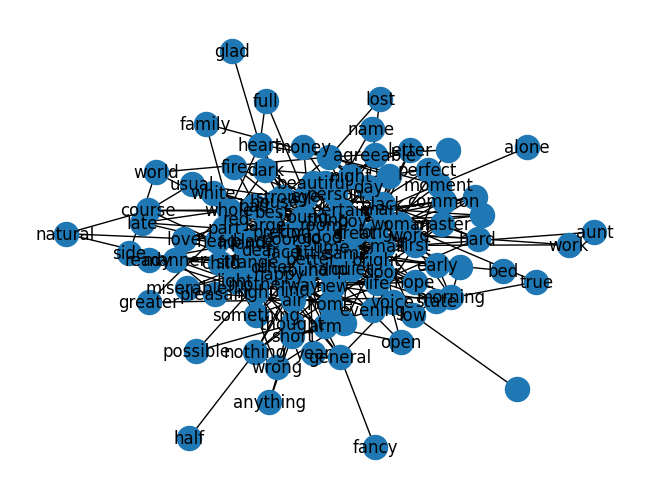

In [45]:
Gc2.add_edges_from(edges)
nx.draw(Gc2, with_labels=True, labels=nx.get_node_attributes(Gc2, 'label'))

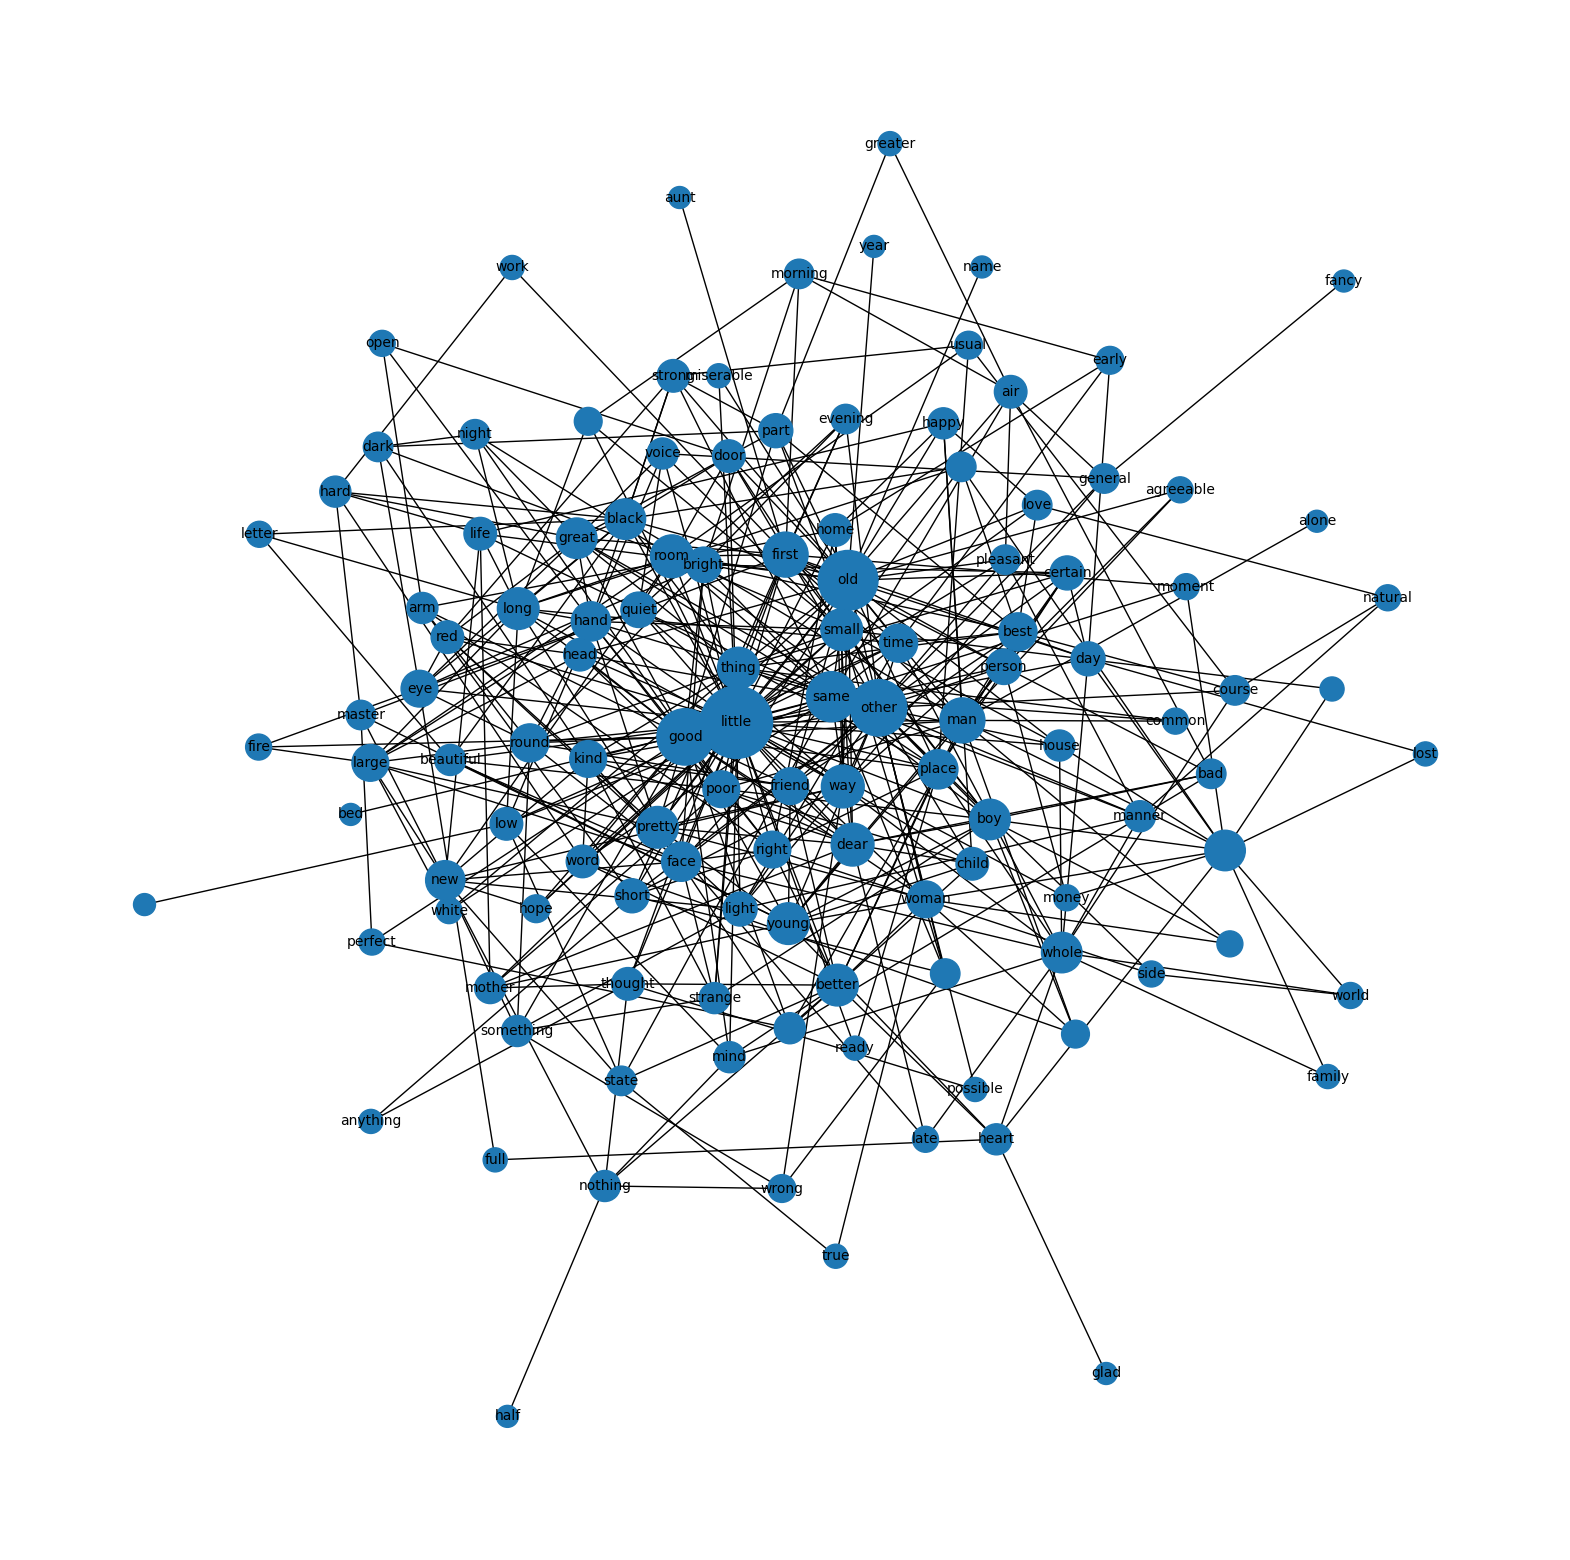

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
pos = nx.kamada_kawai_layout(Gc2)
#pos = nx.layo
# degree - stopien wierzcholka czyli ilsoc krawedzi
node_sizes = [(Gc2.degree(n))*50 + 200 for n in Gc2.nodes()]
nx.draw(Gc2, with_labels=True, labels=nx.get_node_attributes(Gc2, 'label'), ax=ax, pos = pos, node_size=node_sizes, font_size=10)